****Market campaign analysis on which customers we should target for wine purchases.****

Load the data from Drive amd initial exploration below:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np


In [2]:
def list_folder(folder_id):
    # folder_id: GoogleDriveFile['id']
    _q = {'q': "'{}' in parents and trashed=false".format(folder_id)}
    return drive.ListFile(_q).GetList()

  # Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
listed = drive.ListFile({'q': "title contains 'marketing' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title marketing_campaign_wines.csv, id 1rtiilsNIDIktkMUv3ss6L9qpjddrB7OC
title marketing_campaign_wines.xlsx, id 1O7zw4QEm2QTzUlo6eOY4qsEnwaTsZHdj


In [3]:
downloaded = drive.CreateFile({'id':'1rtiilsNIDIktkMUv3ss6L9qpjddrB7OC'}) # replace fileid with Id of file you want to access
downloaded.GetContentFile('marketing_campaign_wines.csv') 

In [4]:


df = pd.read_csv("marketing_campaign_wines.csv") 



In [5]:
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64




**Checking the range of data, outliers with Box plots**




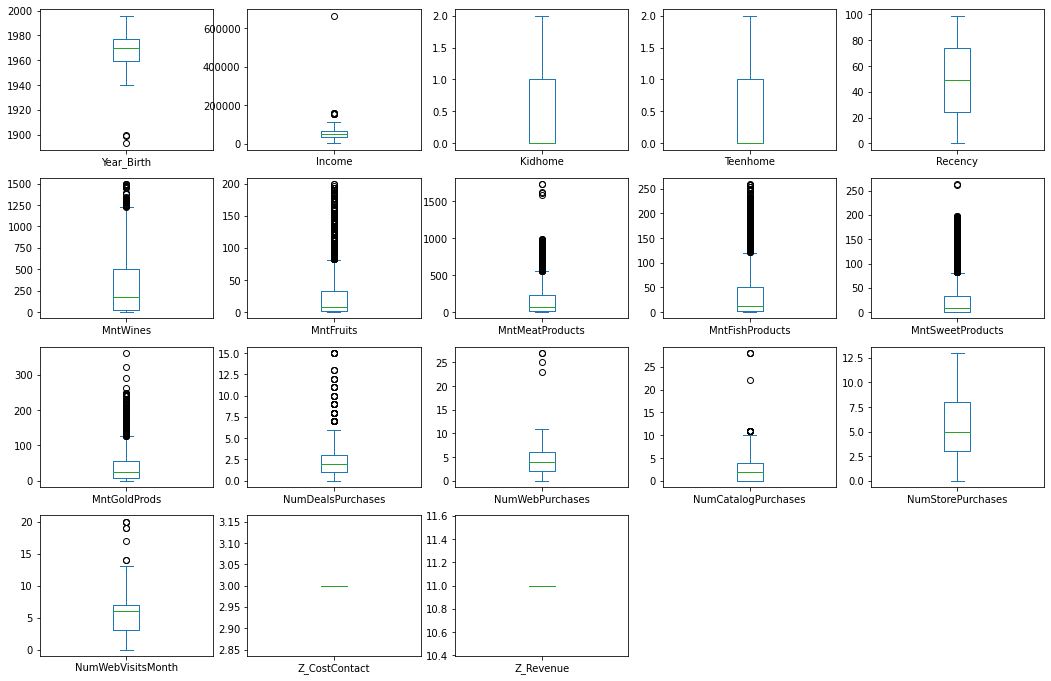

In [8]:
cols = df.select_dtypes(include=['number']).columns
cols = cols.drop(['ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                                  'AcceptedCmp2', 'Response', 'Complain'])
df[cols].plot(subplots=True, layout=(5,5), kind='box', figsize=(18,15))

plt.show()

**Let's check the MntWines field more carefully.**

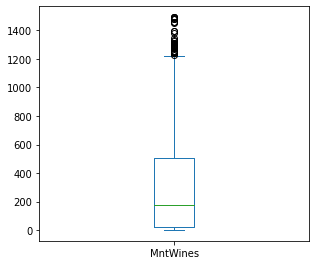

In [9]:
df["MntWines"].plot(subplots=True, layout=(5,5), kind='box', figsize=(28,25))

plt.show()

In [10]:
df["MntWines"].value_counts()

2       42
5       40
1       37
6       37
4       33
        ..
806      1
61       1
986      1
1230     1
428      1
Name: MntWines, Length: 776, dtype: int64

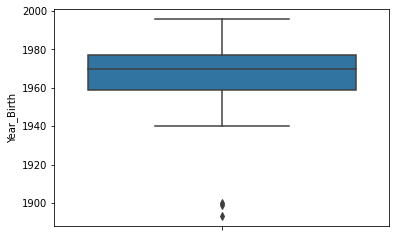

In [11]:
sb.boxplot(y=df["Year_Birth"])

In [12]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

# ***Observations from the initial analysis of the data:***

* **Z_CostContract and Z_Revenue** do not add any value, can be removed.

* **Income** column has 24 null values. 
     We have 2 choices here to deal with, remove them or replace with a median value. Since 24 is not large number,I think it's ok to remove them.


* **Income** column has a clear outlier, seen from the Box plot.Will be removed.

* **Year_of_Birth** also shows a clear outlier which will be removed.


* **MntWines** with value counts 1 can be considered as one-time buyers, can be removed.(I might need to revisit this.)

*  There are outliers in other columns too such as **MntFishProducts**, **MntSweetProducts** etc but keeping them unchanged as of now. Need to check if they have any correlation with MntWines.

* **Dt_Customer** has diff formats, will be made same.

* **Marital_Status** has :
* Alone      2
* Absurd        2
* YOLO          2 
which I think can be reasonably combined with Single.










In [13]:
df.dropna(inplace=True)

In [14]:
# Drop all the unwanted columns
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)


In [15]:
#remove outliers in Year Birth column (births before 1920)
df=df[df['Year_Birth'] >= 1920]

In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [17]:
#remove those entries with count of 1
counts = df['MntWines'].value_counts()
df = df.loc[df['MntWines'].isin(counts.index[counts > 1])]


In [18]:
df.loc[df['Marital_Status']=='Absurd', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status']=='YOLO', 'Marital_Status'] = 'Single'
df.loc[df['Marital_Status']=='Alone', 'Marital_Status'] = 'Single'
df['Marital_Status'].value_counts()

Married     717
Together    484
Single      400
Divorced    190
Widow        66
Name: Marital_Status, dtype: int64

**Let's check some stats from the data.**

Grouping  records into appropriate sub categories- Age in steps of 10 years, Income in steps of $10k. (assuming the Income column represents Income in Dollars)

In [19]:
# Created a Age column based on Year_Birth, used further for creating Age group brackets

df['Age'] = pd.Timestamp('now').year - df['Year_Birth']
df.drop(columns='Year_Birth', inplace=True)


In [20]:
# Create an Age Group column for market segment analysis
# There are 4 records greater than 80 which will be ignored
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['Age Group'] = pd.cut(df['Age'], [20,30,40,50,60,70,80,130], labels=age_labels)


In [21]:
# Create an Income Bracket column for analysing the income influence
income_labels = ['Below 20K', '20K-30K', '30K-40K', '40K-50K','50K-60K', '60K-70K', '70K-80K', '80K-90K', '90K-100K', '100K-150K', '150K-200K', 'Over 200K']
df['Income Group'] = pd.cut(df['Income'], [-np.inf,20000,30000,40000,50000,60000,70000,80000,90000,100000,150000,200000,np.inf], labels=income_labels)


In [22]:
# Dropping if there is any duplicate rows
df.drop_duplicates(inplace=True)

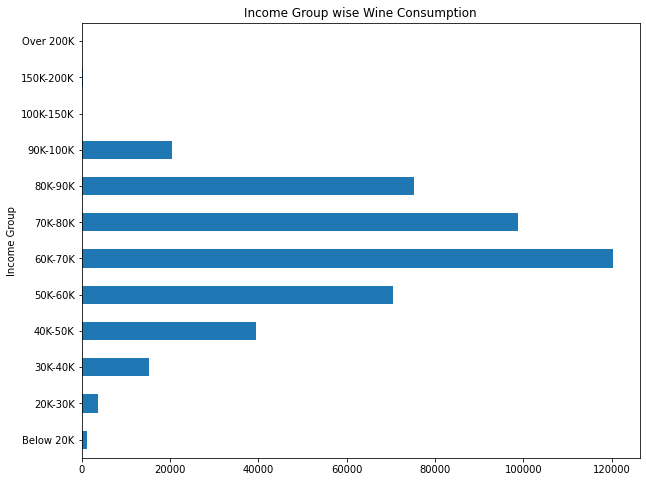

In [23]:

df_plot = df.groupby('Income Group').sum()['MntWines']

df_plot.plot(kind='barh', figsize=(10,8), 
                                     title='Income Group wise Wine Consumption')

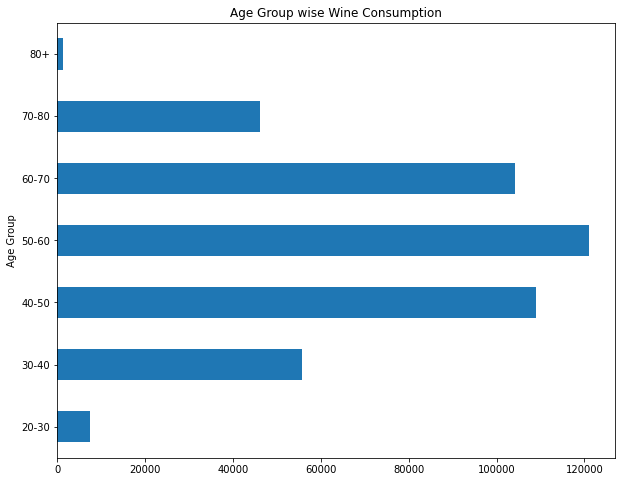

In [24]:
df_plot = df.groupby('Age Group').sum()['MntWines']
df_plot.plot(kind='barh', figsize=(10,8), 
                      xlabel = "Age Group",ylabel="Wine Consumption",title='Age Group wise Wine Consumption')

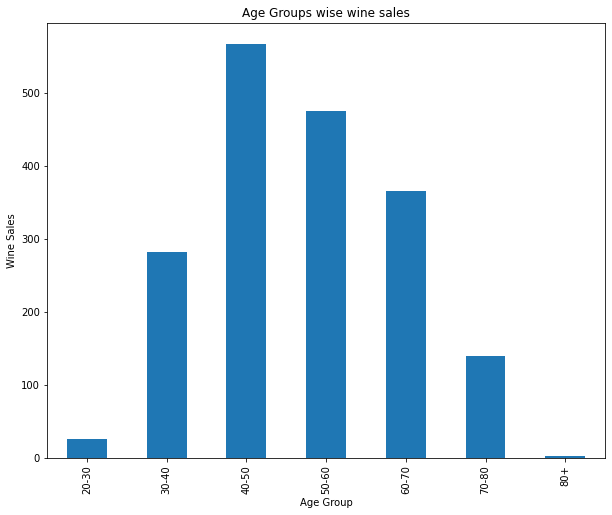

In [25]:
df_plot = df.groupby('Age Group').count()['ID']
df_plot.plot(kind='bar', figsize=(10,8), 
                      xlabel = "Age Group",ylabel="Wine Sales",title='Age Groups wise wine sales')

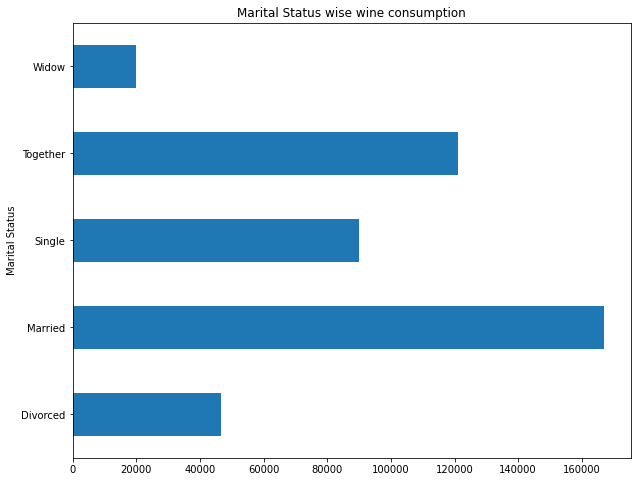

In [26]:
df_plot = df.groupby('Marital_Status').sum()['MntWines']
df_plot.plot(kind='barh', figsize=(10,8), 
                      xlabel = "Marital Status",ylabel="Wine Consumption",title='Marital Status wise wine consumption')

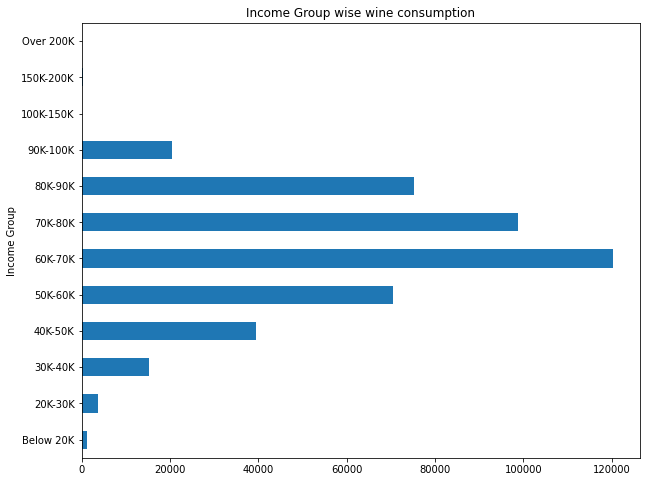

In [27]:
df_plot = df.groupby('Income Group').sum()['MntWines']
df_plot.plot(kind='barh', figsize=(10,8), 
                      xlabel = "Income Group",ylabel="Wine Consumption",title='Income Group wise wine consumption')

In [28]:
df['Income Group'].value_counts()

30K-40K      350
40K-50K      297
60K-70K      253
50K-60K      246
20K-30K      242
70K-80K      187
Below 20K    126
80K-90K      122
90K-100K      25
150K-200K      7
100K-150K      1
Over 200K      1
Name: Income Group, dtype: int64

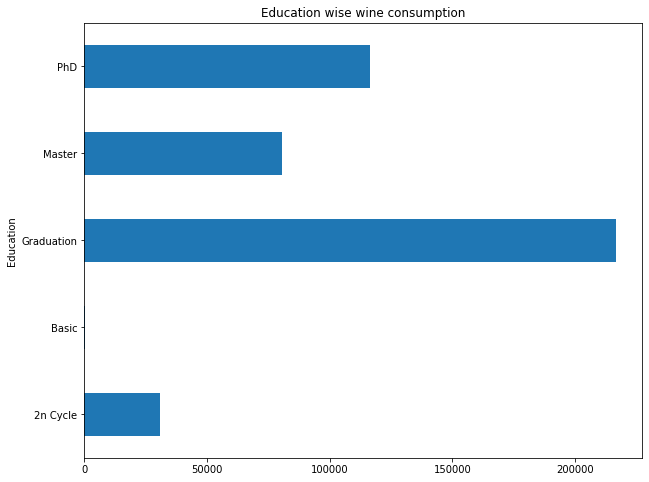

In [29]:
df_plot = df.groupby('Education').sum()['MntWines']
df_plot.plot(kind='barh', figsize=(10,8), 
                      xlabel = "Education",ylabel="Wine Consumption",title='Education wise wine consumption')

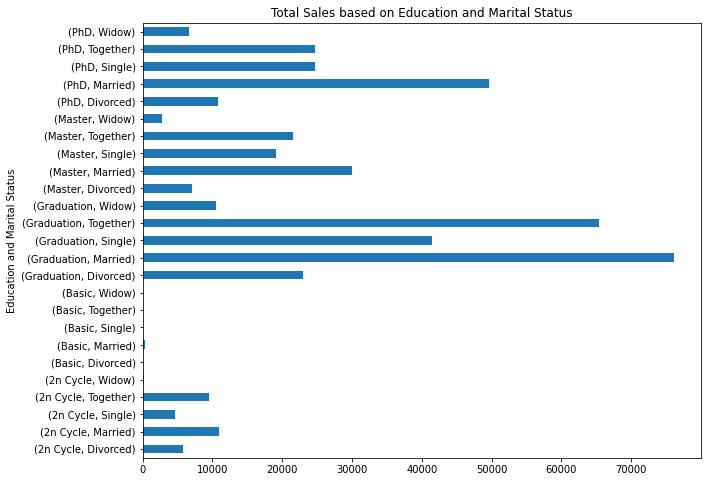

In [30]:
df_plot = df.groupby(['Education', 'Marital_Status']).sum()['MntWines']
df_plot.plot(kind='barh', figsize=(10,8), 
                      xlabel = "Education and Marital Status",ylabel="Total Sales",title='Total Sales based on Education and Marital Status')

**Adding new features and try to find some insights from them.**

In [31]:
# Combine kid and teen as Minors
df_new  = df.copy()
df_new["Minor"] = df_new.Kidhome + df_new.Teenhome
df_new.drop(columns=['Kidhome','Teenhome'], inplace=True)


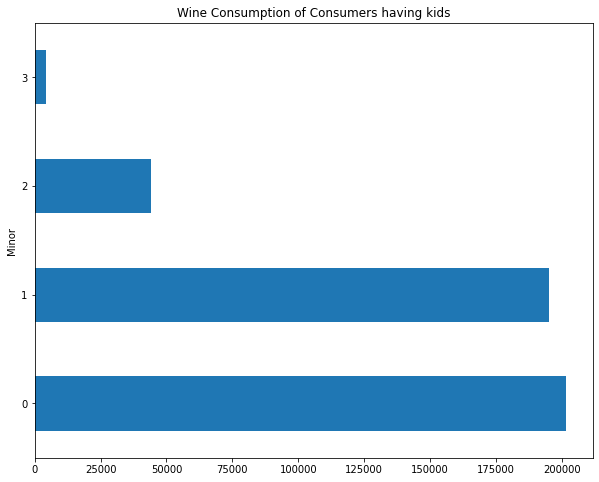

In [32]:
df_plot = df_new.groupby(['Minor']).sum()['MntWines']
df_plot.plot(kind='barh', figsize=(10,8), 
                      xlabel = "Minor",ylabel="Total Sales",title='Wine Consumption of Consumers having kids')

In [33]:
df_new['Minor'].value_counts()

1    941
0    490
2    381
3     45
Name: Minor, dtype: int64

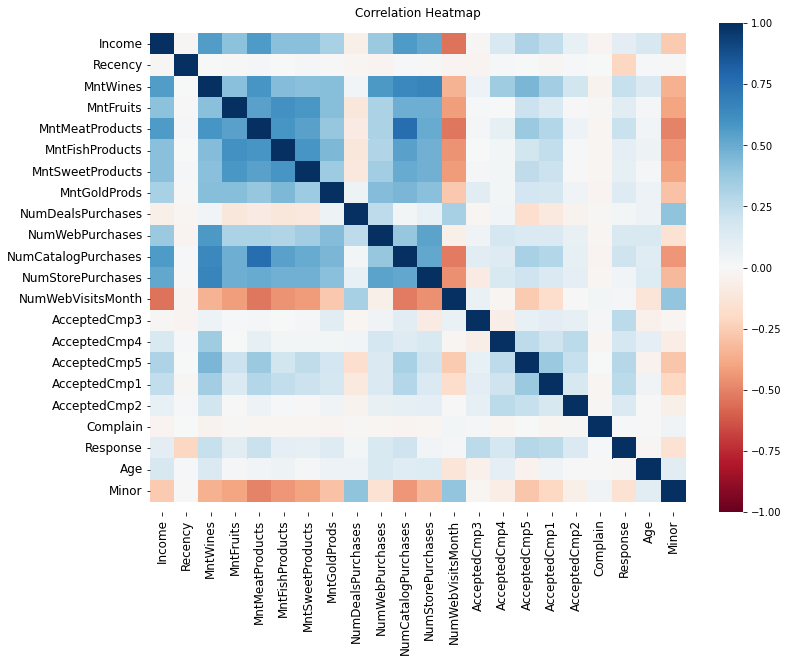

In [34]:
import seaborn as sb
# select columns to plot
df_to_plot = df_new.drop(columns=['ID'])

# create heatmap
plt.figure(figsize = (12, 9))
s = sb.heatmap(df_to_plot.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

# **Insights on target Customers for wine Sale**

* Wine sales are higher amongst the educated, particularly **Graduates** and also **PhD**.
This group has the highest consumption even when sub-groups of Marital status are considered.

* Age Group **40-60 years** are largest consumers of wine

* Consumers who are **Married or Together** are also large consumers of wine.

* Customers who buy wines are generally in the income range of **$60-$80k**.


* Higher Income group visit the company's website less frequently than other people and they seem to prefer purchases through catalogues.

* The high income group also do not seem to care about discounts offered.

* Consumers with **children at home** in general puchase lesser wine than others and when they do they are more interested in discount offers and prefer website shopping instead of store shopping. This is true for other items as well.

* Wine sale is highest from **stores and catalogues**, consumers seem to prefer check the wines physically in the stores. This is true for other items too.(May be this data will change after the pandemic).

* Consumers often buy **wine along with Meat products.** . Maybe wine bottles can be kept near the Meat Products or discounts can be offered on wine bought along with meat.
